<a href="https://colab.research.google.com/github/MarkStephens060482/Beijing-Air-Quality/blob/main/Beijing_Air_Quality_Cleaning_and_EDA_book_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Beijing Multi-Site Air Quality dataset

The data set considers hourly observations of 6 main air pollutants and 6 relevant meteorological variables at multiple sites in Beijing over a 5 year period. The data is recorded by 12 nationally-controlled air-quality monitoring sites.

<center>
<h2> The Data </h2>
    
The data used in this project was sourced from Machine Learning Repository, https://archive.ics.uci.edu/ml/datasets/Beijing+Multi-Site+Air-Quality+Data. The dataset contains daily weather information of temperature, pressure, dewpoint, precipitation, wind direction and wind speed. It also contains daily air quality measures of particulate matter 2.5 and 10 concentrations, sulfur dioxide, nitrogen dioxide, carbon monoxide and ozone concentrations. The data set comprises of over 420000 instances of 18 attributes as outlined below:

| Attribute | Description| Type |
| :--- | :--------------- | :----: |
|**No**| Row number. | int|
|**Year**| Year of observation.| int|
|**Month**| Month of observation.| int|
|**Day**| Day of observation.| int|
|**Hour**| Hour of observation.| int|
|**PM2.5**| Particulate matter concentration, particles with a diameter of 2.5 micrometres or less. (ug/m^3)| float|
|**PM10**| Particulate matter concentration, particles with a diameter of 2.5 micrometres or less. (ug/m^3)| float|
|**SO2**| Sulfur dioxide concentration (ug/m^3).| float|
|**NO2**| Nitrogen dioxide concentration (ug/m^3).| float|
|**CO**| Carbon monoxide concentration (ug/m^3).| float|
|**O3**| Ozone concentration (ug/m^3).| float|
|**TEMP**| Temperature (degree Celsius).| float|
|**PRES**| Pressure (hPa).| float|
|**DEWP**| Dew point temperature (degree Celsius).| float|
|**RAIN**| Precipitation (mm).| float|
|**wd**| Wind direction| str|
|**WSPM**| Wind speed measurement (m/s).| float|
|**Station**| Name of the air-quality monitoring site.| str|

***
## Problem definition
Particulate matter 2.5 (PM2.5), are fine tiny particles in the air that are two and a half microns less in width and can present significant health concerns if inhaled as they are able to travel deeply into the respiratory tract, reaching the lungs. The goal is to predict the concentration of this particular air pollutant based on other air quality and meteorological measures over temporal and spatial scales in the context of the city of Beijing, China.   

***
## Loading the data set
The complete data set is segregated by the variable *Station* into 12 seperate *csv* files. The data is loaded and joined together to form a single dataframe. A **date** variable is produced from **year**, **month** and **day** and added as a column to the dataframe. The dataframe is sorted in chronological order. The column **No** is dropped as it is a row number.

In [ ]:
# importing important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import datetime as dt
import os, glob


#_________The data files are to be loaded into sub folder of the current working directory called 'data'________
# Get the current working directory
cwd = os.getcwd()

# load the data into a pandas dataframe
files = glob.glob(cwd + "\data\*.csv")

# read the csv files one at a time and concatenate to a dataframe.
dfs = []
for file in files:
    with open(file,encoding="utf-8") as dataFile:
        df = pd.read_csv(dataFile,index_col=False)
        dfs.append(df)

# join each dataframe    
beijing_raw = pd.concat(dfs)

#create a date column
beijing_raw.insert(1,'date', pd.to_datetime(dict(day=beijing_raw.day,
                                                 month=beijing_raw.month,
                                                 year=beijing_raw.year),
                                            dayfirst= True))
# sort data by date
beijing_raw.sort_values(by=['date','hour'], inplace=True)

#Drop the 'No' column
beijing_raw.drop(columns ='No', inplace = True) 

# reorder the index
beijing_raw.reset_index(drop=True, inplace = True)

beijing_raw.head()

,date,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013-03-01,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
2,2013-03-01,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
3,2013-03-01,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
4,2013-03-01,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan


***
## Examining the data
The target variable, *PM2.5*, is a continuous numerical variable with values rounded to nearest integer. The dataset is examined to identify missing values, duplicate values, erroneous values and outlier values. 

In [ ]:
#examine variables
beijing_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   date     420768 non-null  datetime64[ns]
 1   year     420768 non-null  int64         
 2   month    420768 non-null  int64         
 3   day      420768 non-null  int64         
 4   hour     420768 non-null  int64         
 5   PM2.5    412029 non-null  float64       
 6   PM10     414319 non-null  float64       
 7   SO2      411747 non-null  float64       
 8   NO2      408652 non-null  float64       
 9   CO       400067 non-null  float64       
 10  O3       407491 non-null  float64       
 11  TEMP     420370 non-null  float64       
 12  PRES     420375 non-null  float64       
 13  DEWP     420365 non-null  float64       
 14  RAIN     420378 non-null  float64       
 15  wd       418946 non-null  object        
 16  WSPM     420450 non-null  float64       
 17  station  4

All variables have been read correctly and are of the correct data type.
A number of missing values are observed. The proportion of missing values per column is given below:

In [ ]:
# produce a dataframe of proportion of missing values per column.
pd.DataFrame(round(100*beijing_raw.isnull().sum()/beijing_raw.count(),1),
             columns = ['missing values (%)'])

,missing values (%)
date,0.0
year,0.0
month,0.0
day,0.0
hour,0.0
PM2.5,2.1
PM10,1.6
SO2,2.2
NO2,3.0
CO,5.2


All features have no more than approximately 5% of missing values. Missing values are visualised below to see if patterns are identifiable. Varialbes with missing values are to be examined further.

<AxesSubplot:>

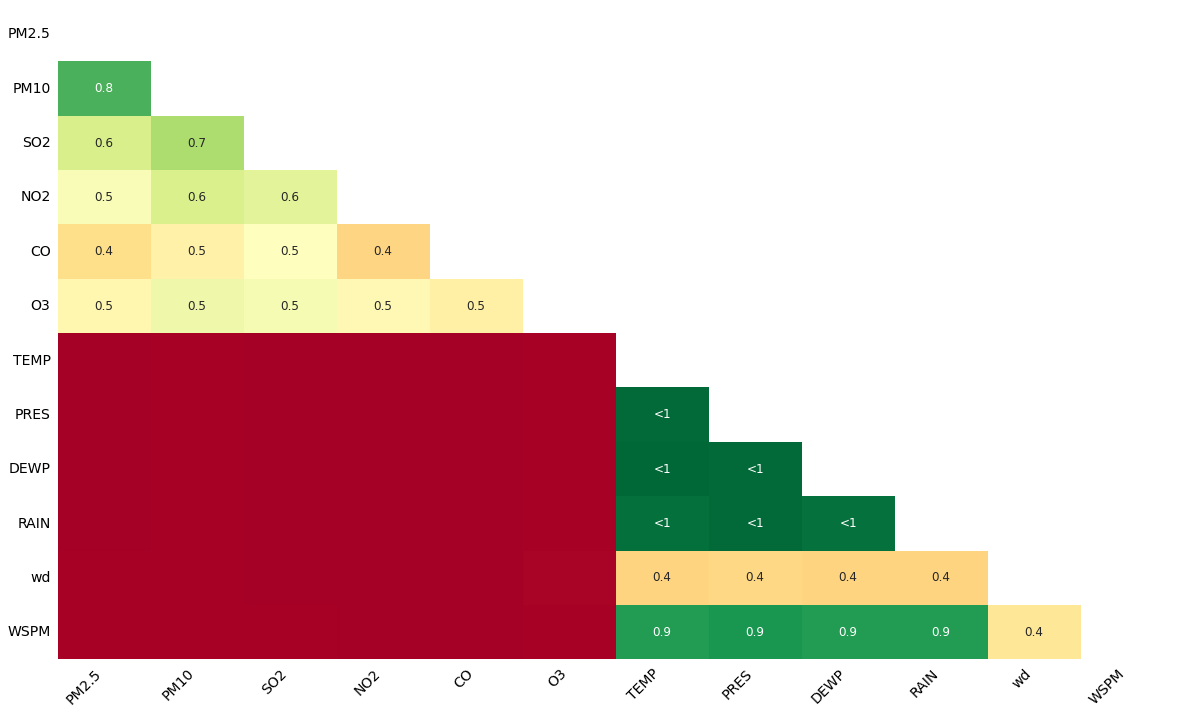

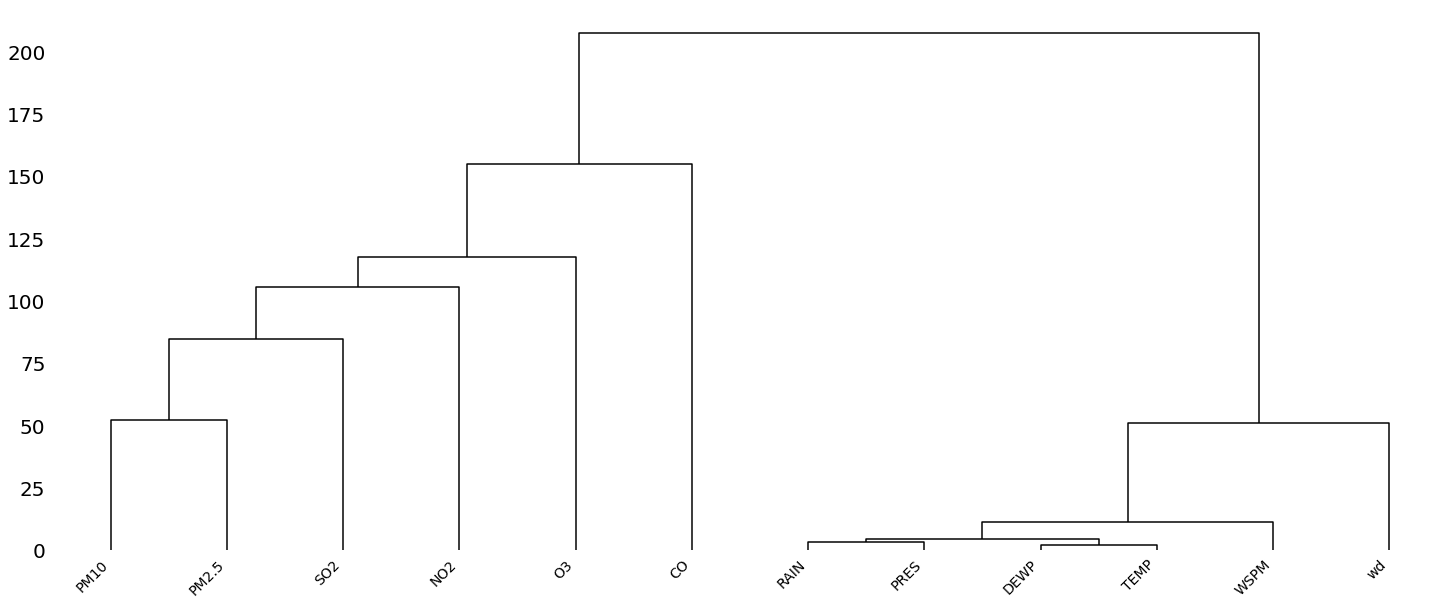

In [ ]:
msno.heatmap(beijing_raw,
             cmap="RdYlGn",
             sort="ascending", 
             fontsize=14)

msno.dendrogram(beijing_raw.drop(columns =
                                 [x for x in beijing_raw.columns
                                  if beijing_raw[x].isnull().sum() == 0]),
                orientation="top",
                method="ward",
                fontsize=14)

#### Figure 1: Nullity correlation and missingness clustering
The heatmap of the nullity correlation matrix suggests that incidences of missing values of the air quality measures share no dependency with incidences of missing values of the meteorological measures. This is supported by definite clustering of the two seperate groups of measures as shown in the dendrogram. The incidences of missing values of the meterological measures are predominantly positively correlated, indicating a missing not at random (MNAR) mechanism. Whereas the incidences of missing values of air quality measures are subjected to a combination of missing at random (MAR) and missing not at random (MNAR) mechanisms.      

In [ ]:
# Inspect summary statistics of numeric variables
beijing_raw.drop(columns=['date','year','month','day','hour']).describe().apply(lambda x: round(x,2))

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,412029.00,414319.00,411747.00,408652.00,400067.00,407491.00,420370.00,420375.00,420365.00,420378.00,420450.00
mean,79.79,104.60,15.83,50.64,1230.77,57.37,13.54,1010.75,2.49,0.06,1.73
std,80.82,91.77,21.65,35.13,1160.18,56.66,11.44,10.47,13.79,0.82,1.25
min,2.00,2.00,0.29,1.03,100.00,0.21,-19.90,982.40,-43.40,0.00,0.00
25%,20.00,36.00,3.00,23.00,500.00,11.00,3.10,1002.30,-8.90,0.00,0.90
50%,55.00,82.00,7.00,43.00,900.00,45.00,14.50,1010.40,3.10,0.00,1.40
75%,111.00,145.00,20.00,71.00,1500.00,82.00,23.30,1019.00,15.10,0.00,2.20
max,999.00,999.00,500.00,290.00,10000.00,1071.00,41.60,1042.80,29.10,72.50,13.20


From an initial inspection the variables **PM2.5**, **PM10**, **SO2** and **CO** have their mean value much greater than their median value, indicating significant positive skew due to outliers.  

In [ ]:
# inspecting for duplicate observations.
duplicate = beijing_raw[beijing_raw.duplicated()]
 
print(f"Number of duplicate rows: {len(duplicate)}")

Number of duplicate rows: 0


There are no duplicate observations in the data.

## Exploratory Data Analysis
The trends and correlations between variables are explored in order to identify key features to model variations in the target variable **PM2.5**. This is to be done by the following:
1. correlation matrix heatmap of numerical variables.
2. Pairplot of numerical variables.
3. TimeSeries trends of target variable. 

### Heatmap of correlation matrix
The variables to examine are numerical variables

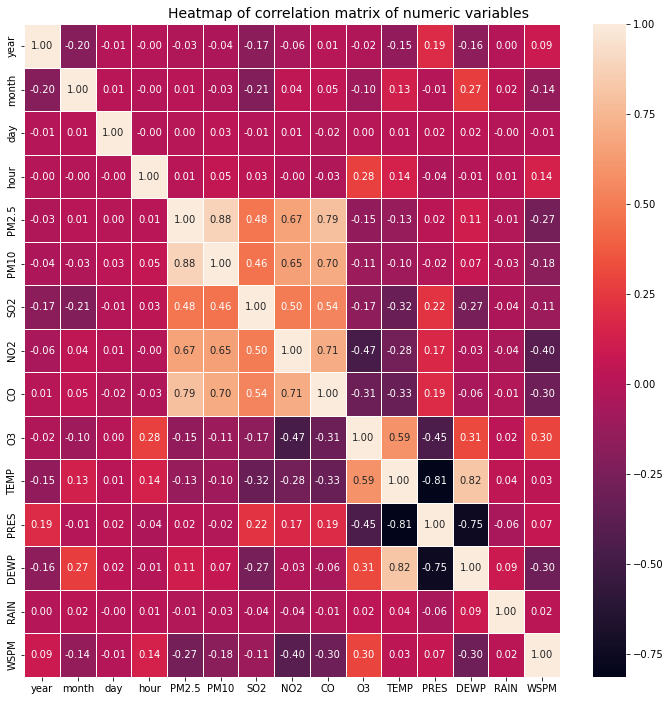

In [ ]:
beijing_plot1 = beijing_raw.corr(numeric_only=True)
plt.figure(figsize=(12,12))
sns.heatmap(data=beijing_plot1, annot = True, fmt='.2f', linewidths=.5)
plt.suptitle("Heatmap of correlation matrix of numeric variables", y = 0.9, size = 14 )
plt.show()

#### Figure 2: Correlation Heatmap
The correlation heatmap shows the pearson correlation coefficient between variables. The target variable **PM2.5** exhibits virtually zero correlation with the time variables **hour**, **day**, **month** and **year**, but further exploration may be necessary. While **PM10** has the highest correlation with the target variable **PM2.5**, as the two variables are closely related as they are likely measured from very similar air quality instruments. The problem statement is to predict concentration of **PM2.5** from other compound concentration measurements and meteorological measurements. For this purpose, **PM10** will be omitted from the model. While considering the meteorological measures, **PRES**, the air pressure has very little correlation with **PM2.5** and at the same time is highly correlated with other possible predictors **TEMP**, air temperature, and **DEWP**, the dew point temperature. Also, those same possible predictors **TEMP** and **DEWP** are also highly correlated with each other and so as **DEWP** is the less correlated variable to the target variable, it will also be omitted. The other meteorological variable to be omitted from the model is **RAIN** as it is uncorrelated with **PM2.5**.

### Pairplot
The numerical variables considered as possible predictors are examined, excluding **year**, **month**, **day** and **hour**. As the dataset is large, a random sample of the dataset is obtained and the plot is produced. 

Text(0.5, 1.03, 'Pair Plot of numerical predictors and target variable PM2.5 for sample data from 2015')

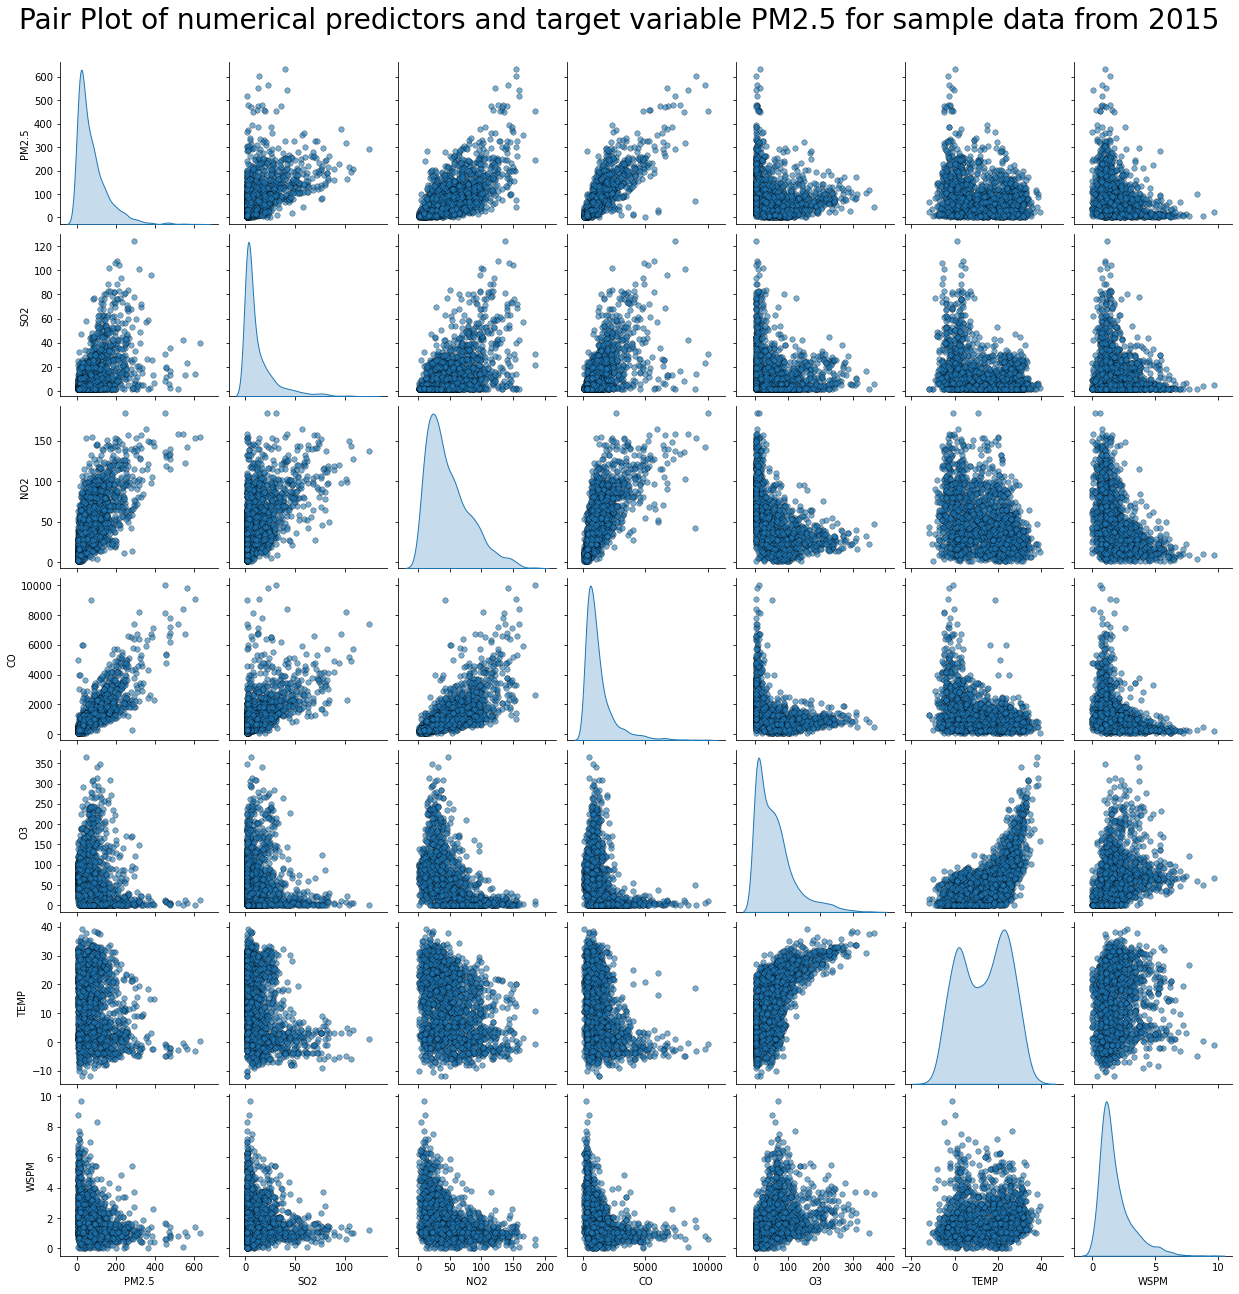

In [ ]:
year = 2015
beijing_plot2 = beijing_raw[beijing_raw.year == year]
beijing_plot2 = beijing_plot2.drop(columns = 
                                   ['PM10',
                                    'RAIN',
                                    'PRES',
                                    'DEWP',
                                    'year',
                                    'month',
                                    'day',
                                    'hour']).sample(2000)
sns.pairplot(beijing_plot2,
             diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 30, 'edgecolor': 'k'}
             )         
  # Title 
plt.suptitle(f'Pair Plot of numerical predictors and target variable PM2.5 for sample data from {year}', 
             size = 28,
             y=1.03)         

#### Figure 3 Pairplot of numerical variables.
The distributions of variables are positively skewed with outliers and so variables may be transformed to improve normality.

### Time series plots
The trends in the target variable are to be observed over the different time periods and locations. A **weekend** variable, a binary categorical variable identifying whether the day is a weekend or not, is examined if it has an association on the target variable **PM2.5**.

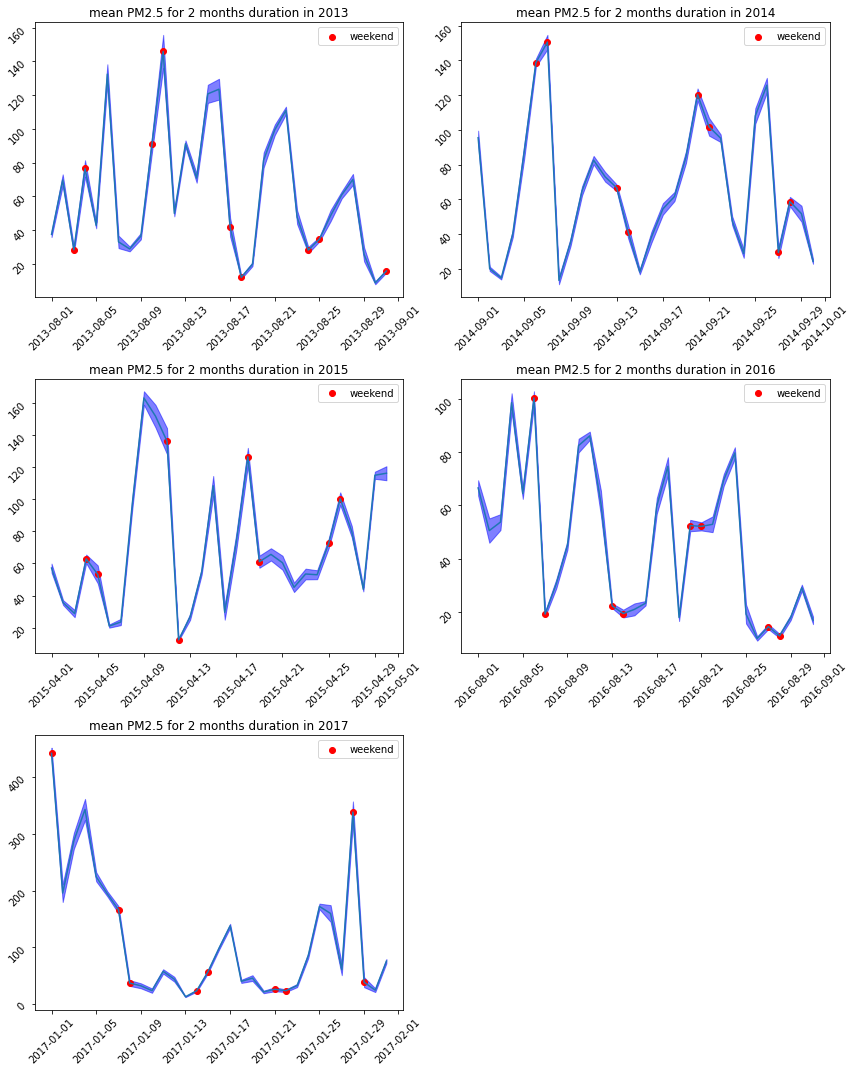

In [ ]:

# Create a binary variable for Weekends, yes/no.
beijing_plot3 = beijing_raw.loc[:,['date','year','month','day','hour','PM2.5','station']]


# Add weekend? variable to dataframe
beijing_plot3['weekend'] = 'no'
beijing_plot3.loc[(beijing_plot3['date'].dt.day_name() == 'Saturday') |
                  (beijing_plot3['date'].dt.day_name() == 'Sunday'),
                  'weekend'] = 'yes'


#view a snap shot of a average values of PM2.5 per day for a  given period of months for each year.
month_duration = 1
years = beijing_plot3.year.unique()
#initialise the figure for the visualisation.
fig,axs = plt.subplots(3,2,figsize = (12,15))
axs = axs.flatten()
#loop through the axis of the 6 subplot of the figure. 
for i,ax in enumerate(axs):
    if i > len(years)-1:
        break
    year = years[i]
    month_start = np.random.randint(2,12)
    if year == 2017:
        month_start = 1
    #filter a snapshot of the dataset for a given period for each year.
    beijing_plot3_filtered = beijing_plot3[(beijing_plot3.year == year) &
                              (beijing_plot3.month >= month_start) &
                              (beijing_plot3.month <= month_start + (month_duration-1))]
    
    # produce statistics on PM2.5 for each subset of the date.
    beijing_plot3_grouped = beijing_plot3_filtered.groupby(['date','weekend'])['PM2.5'].agg(['mean','std','count'])
    
    #reset the index to have date and weekend? as columns
    beijing_plot3_grouped = beijing_plot3_grouped.reset_index()

    #include confidence intervals on the mean value of PM2.5
    beijing_plot3_grouped['ci_lower'] = beijing_plot3_grouped.eval('mean - 1.96*(std/(count**0.5))')
    beijing_plot3_grouped['ci_upper'] = beijing_plot3_grouped.eval('mean + 1.96*(std/(count**0.5))')
    
    #Further filtered dataframe for weekend only.
    beijing_plot3_grouped_weekend =  beijing_plot3_grouped[beijing_plot3_grouped['weekend'] == 'yes']
    
    #defining the x axis of the subplot
    x = beijing_plot3_grouped['date']
    ax.plot(x, beijing_plot3_grouped['mean'])
    
    ax.fill_between(
        x, beijing_plot3_grouped['ci_lower'],beijing_plot3_grouped['ci_upper'], color='b', alpha=.5)
    
    #produce weekend plot
    ax.scatter(beijing_plot3_grouped_weekend['date'], beijing_plot3_grouped_weekend['mean'], color = 'r', label = 'weekend')
    ax.legend()
    ax.set_title(f'mean PM2.5 for {month_duration+1} months duration in {year}')
    ax.tick_params(labelrotation=45)
fig.tight_layout()    
axs[5].remove()


#### Figure 4: Time Series of mean PM2.5 highlight weekends
Inspecting the time series graphs suggest that incidences of low mean **PM2.5** concentrations coincide with weekend periods more often than not. This suggests that some association between **PM2.5** and **weekend** may exist, therefore the variable will be considered in the model.

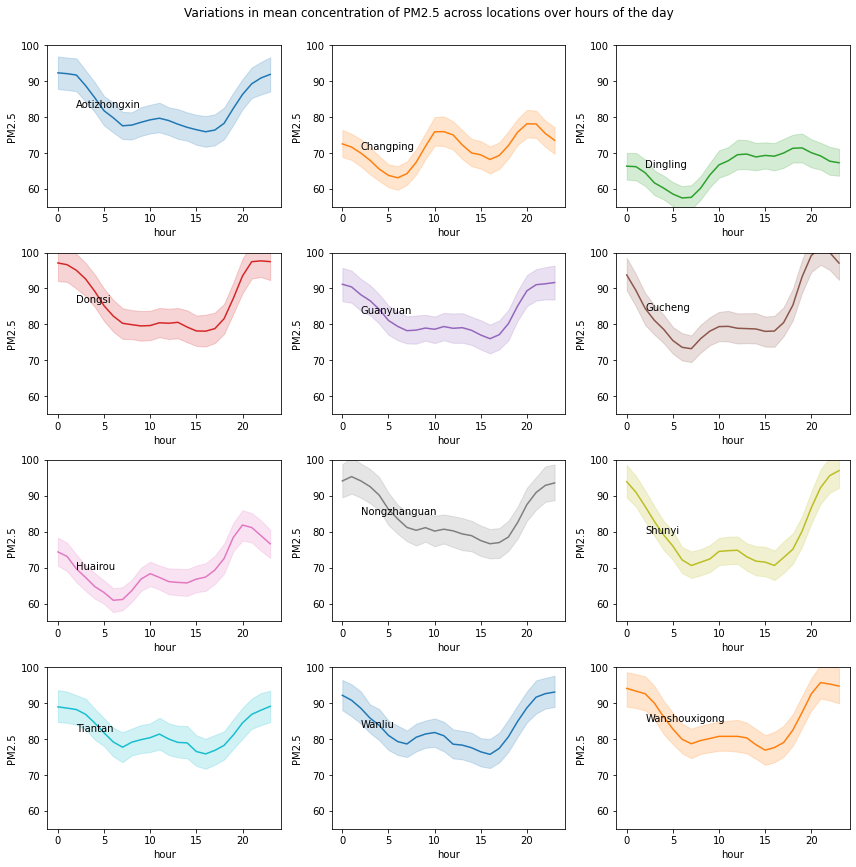

In [ ]:
fig,axs = plt.subplots(4,3,figsize = (12,12))
station_list = list(beijing_raw.station.unique())
axs = axs.flatten()
for i, ax in enumerate(axs):
    plot_data = beijing_raw[beijing_raw['station'] == station_list[i]]
    label_pos = plot_data['PM2.5'].mean()
    c = sns.color_palette()[np.mod(i,10)]
    sns.lineplot(data = plot_data,
             x = 'hour',
             y = 'PM2.5',
             #hue = 'station',
             color = c,
             ax = ax)
    ax.annotate(station_list[i],(2,label_pos))
    ax.set_ylim([55, 100])

plt.suptitle("Variations in mean concentration of PM2.5 across locations over hours of the day", y=1.0)
plt.tight_layout()
plt.show()
         

#### Figure 5: Time Series of mean PM2.5 over hours of the day for different locations
The time series plots show that mean **PM2.5** concentration is generally at its lowerest between the 6th and 16th hour of the day and is increasing outsie of this time period. This trend is predominantly consistent across the different locations. It is also noticable that the magnitude of mean **PM2.5** concentration varies across some location,s even though the variation is not of a significant amount. The general trend of **PM2.5** with changes in **hour** remains fairly consistent across the regions with little deviation. This suggests some dependency of **PM2.5** on **hour** and also **station**, though to a lesser extent. 

### Principal Component Analysis
PCA is performed on numeric variables excluding the target variable **PM2.5** to identify the influence that the features have on the principal components. Categorical variables are converted to dummy variables via a One Hot encoder, then the numeric variables are standardised prior to determining principal components. For the purpose of performing PCA in exploratory data analysis, null values are removed. The features identified in exploratory analysis of time series trends on **PM2.5**, **weekend**, **hour** and **station**, as well as **wd**, wind direction, are to be considered in the Principal Component Analysis. All components are to be intially considered, identifying the proportion of variance explained by the first and seconds principal component and the squared correlation loadings for each of their possible features. This gives an indication of variable importance, which can inform feature selection.     

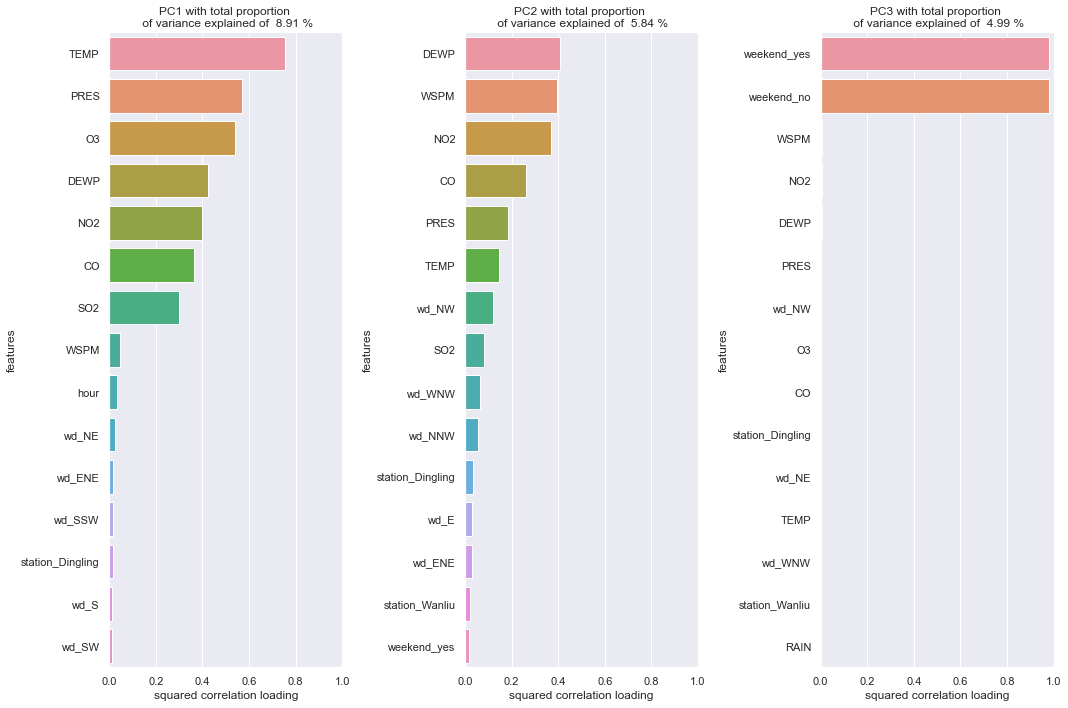

In [ ]:
# load appropriate modules
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
sns.set()

# obtain features on interest, iincluding numeric and categorical.
pca_dataset = beijing_raw.drop(columns = ['year','month','day','PM10','PM2.5'])

# Add weekend variable to main dataframe
pca_dataset['weekend'] = 'no'
pca_dataset.loc[(pca_dataset['date'].dt.day_name() == 'Saturday') |
                  (pca_dataset['date'].dt.day_name() == 'Sunday'),
                  'weekend'] = 'yes'

#set date as the index
pca_dataset.set_index('date',drop  = True, inplace = True)

# removing null values for analysis
pca_dataset.dropna(inplace = True)

#One Hot Encode Categorical variables
ohenc = OneHotEncoder()
transformed = ohenc.fit_transform(pca_dataset[['weekend','wd','station']])

# Form a dataframe of One Hot Encoded variables
ohenc_df = pd.DataFrame(transformed.toarray(),columns = ohenc.get_feature_names_out(), index = pca_dataset.index )

# join One Hot Encoded variables dataframe with other numerical variable dataframe
pca_dataset1 = pd.concat([pca_dataset, ohenc_df], axis=1).drop(ohenc.feature_names_in_, axis=1)

#standardise the variables
scaler = StandardScaler()
x = scaler.fit_transform(pca_dataset1)
x = pd.DataFrame(x, columns = pca_dataset1.columns)

# transform scaled data to principal components
pcamodel = PCA()
pca = pcamodel.fit_transform(x)

#Principal Component correlation loadings - correlations between the original variable and the principal components.
loadings = pd.DataFrame(
    data = pcamodel.components_.T * np.sqrt(pcamodel.explained_variance_),
    columns = [f'PC{i}' for i in range(1, len(pcamodel.explained_variance_) + 1)],
    index = x.columns)

#sorted squared loadings - proportion of variation in the PC explained by variations in the features. 
squared_loadings_sorted = (loadings**2).sort_values(by='PC1', ascending=False)

# Initialize the matplotlib figure
fig, axs = plt.subplots(1,3,figsize=(15, 10))
axs = axs.flatten()
top_n = 15
for i, ax in enumerate(axs):
    category = squared_loadings_sorted.iloc[:,i].sort_values(ascending=False).head(top_n)
    var_explained = pcamodel.explained_variance_ratio_[i]*100 
    sns.barplot(x = category, y=category.index, ax = ax)
    ax.set(xlim=(0, 1),
           ylabel="features",
           xlabel="squared correlation loading",
           title = f"PC{i+1} with total proportion \n of variance explained of {var_explained: .2f} %")
plt.tight_layout()

#### Figure 6: Squared correlation loadings of feature variables in first 3 Principal Components
The above graphs give a break down of the top features and their influence in explaining variations in the first three principal components. Predominantly the meteorological and air quality measures are features of most importance, except for the **RAIN** variable. The temporal factor of hour of the day, **hour**, appears to contribute some explanation to Principal Component 1, while the **weekend** variable interestingly dominates the third principal component, contributing to 5% of explained variation. It is also noted that wind direction, **wd**, although having little influence overall, appears to have greater influence than the spatial location, **station**. Also, the first 3 principal components contribute only as much as 20% to the proportion of explained variance overall, suggesting that the combination of features contribute little information and is mostly noise.

Principal Component Analysis is performed a sencond time but with fewer features. The **station**, **wd** and **RAIN** variables are omitted to examine if this gives components of greater explained variance ratios.

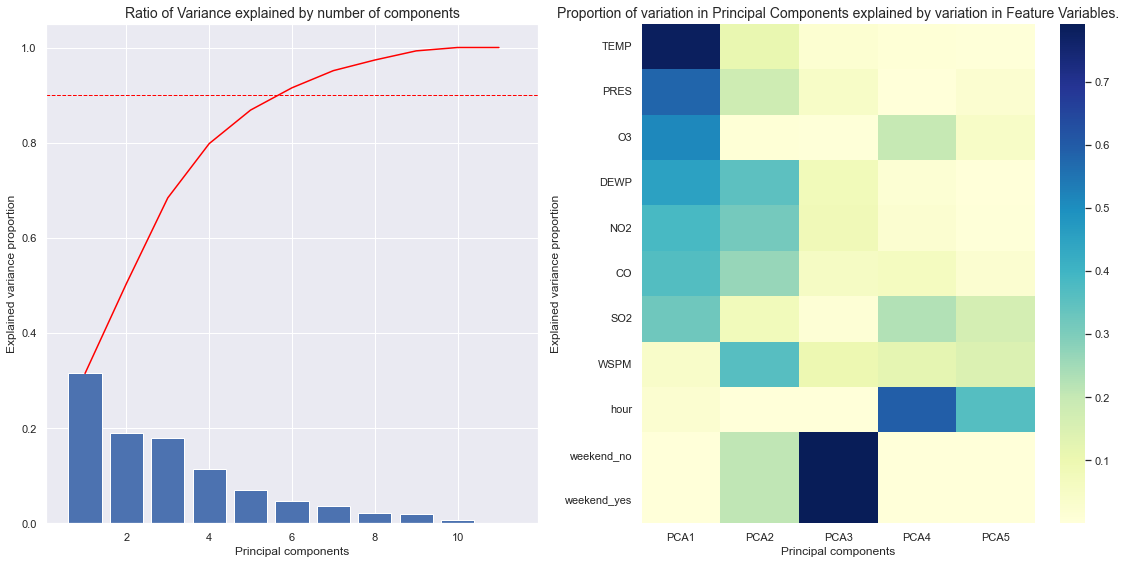

In [ ]:
# list of categorical features
categories = pca_dataset.select_dtypes(include=['object']).columns.to_list()

# drop features
drop_vars = ['station','RAIN','wd']
pca_dataset2 = pca_dataset.drop(columns = drop_vars)

#remaining categorical variables
remaining_categories = [e for e in categories if e not in drop_vars]

if len(pca_dataset2[remaining_categories].columns) > 0:
    #One Hot Encode Categorical variables
    ohenc = OneHotEncoder()
    transformed = ohenc.fit_transform(pca_dataset2[remaining_categories])

    # Form a dataframe of One Hot Encoded variables
    ohenc_df = pd.DataFrame(transformed.toarray(),columns = ohenc.get_feature_names_out(), index = pca_dataset2.index )

    # join One Hot Encoded variables dataframe with other numerical variable dataframe
    pca_dataset2 = pd.concat([pca_dataset2, ohenc_df], axis=1).drop(ohenc.feature_names_in_, axis=1)

#standardise the variables
scaler = StandardScaler()
x = scaler.fit_transform(pca_dataset2)
x = pd.DataFrame(x, columns = pca_dataset2.columns)

# transform scaled data to principal components
pcamodel = PCA(whiten = True, svd_solver='full' )
pca = pcamodel.fit_transform(x)

# number of components to achieve 90% of explained variance
var90_ncomps = sum(np.cumsum(pcamodel.explained_variance_ratio_) <= 0.9)

#Principal Component correlation loadings - correlations between the original variable and the principal components.
loadings = pd.DataFrame(
    data = pcamodel.components_[:var90_ncomps].T * np.sqrt(pcamodel.explained_variance_[:var90_ncomps]),
    columns = [f'PC{i}' for i in range(1, var90_ncomps + 1)],
    index = x.columns)

#sorted squared loadings - proportion of variation in the PC explained by variations in the features. 
squared_loadings_sorted = (loadings**2).sort_values(by='PC1', ascending=False)


#Produce explained variance ratio vs components and squared loadings vs feature variables
fig, axs = plt.subplots(1,2, figsize = (16, 8))
axs = axs.ravel()
axs[0].bar(range(1,len(pcamodel.explained_variance_ratio_)+1),
           pcamodel.explained_variance_ratio_)
axs[0].plot(range(1,len(pcamodel.explained_variance_ratio_)+1),
           np.cumsum(pcamodel.explained_variance_ratio_),
            c='red',
            label = "Cumulative Explained Variance Proportion")
axs[0].set_xlabel('Principal components')
axs[0].set_ylabel('Explained variance proportion')
axs[0].set_title('Ratio of Variance explained by number of components', size = 14) 
axs[0].axhline(y=0.9, xmin=0, xmax=1, c="red", linewidth=1, linestyle= '--')
#second graph is a heatmap of 
sns.heatmap(squared_loadings_sorted,
            cmap='YlGnBu',
            xticklabels=[ "PCA"+str(x) for x in range(1,var90_ncomps+1)],
            yticklabels=list(squared_loadings_sorted.index),
            ax=axs[1],
            cbar_kws={"orientation": "vertical"})
axs[1].set_xlabel('Principal components')
axs[1].set_ylabel('Explained variance proportion')
axs[1].set_title('Proportion of variation in Principal Components explained by variation in Feature Variables.', size = 14) 
#axs[1].set_aspect("equal")
plt.tight_layout()
plt.show()

#### Figure 7: Explained variance across PCs and squared correlation loadings of selected feature variables
The above graphs highlight that 5 principal components are required to explain 90% of the variation observed in the data. The variables of importance that explain the most variability in the first principal component are the meteorological meansures, exluding **RAIN**, and the air quality measures. The wind spead, **WSPM** and hour of the day variable **hour** contribute the least information, as well as the **weekend** variable, though is a significant minor contributor in explaining variability in the data.   

***
# Data cleaning and pre-processing
The general cleaning and pre-processing of data involves imputing missing values, dealing with outliers, transforming variables and encoding categorical variables, standardising or normalising numerical variables.  The pre-processing steps are defined in pipelines to then be appending with an appropriate model. 

### General preprocessing
The general preprocessing steps applied to the data that is applicable for all models are outlined as follows:
1. Include new feature **weekend** into the dataframe and drop the **date** feature.
2. Impute missing values using a multivariable imputation technique.
3. Detect multivariate outliers using Mahalanobis distance.

#### Adding and removing features
The **date** variable will be removed as inherent information is incorporatedin the other time releated variables, while the variable **weekend**, whose association whith changes in **PM2.5** was identified previously, will be included for modelling.

In [ ]:
#add weekend column to main dataframe
# Add weekend variable to main dataframe
beijing_raw['weekend'] = 'no'
beijing_raw.loc[(beijing_raw['date'].dt.day_name() == 'Saturday') |
                  (beijing_raw['date'].dt.day_name() == 'Sunday'),
                  'weekend'] = 'yes'

#define dataframe for imputation
beijing_preproc = beijing_raw.drop(columns = 'date').copy()

#### Data imputation
Missing data will be imputed using a Random Forest based imputation technique. It is based on an iterative approach, and at each iteration the generated predictions are improved. Categorical variables will be encoded as ordinal variables, then all variables together, including continuous variables will be imputed using the random forest imputation algorithm. The imputed values are constrained to the range of the numerical features of the original data and the range of the encoded categorical variables. This is defined as a custom function that is then converted to a transformer so it may be used in a pipeline.

In [ ]:
# import libraries for imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
#import library for encoding
from sklearn.preprocessing import OrdinalEncoder
#import library for preprocessing particular features.
from sklearn.compose import make_column_transformer
#import library for regression estimator.
from sklearn.ensemble import RandomForestRegressor
#import pipeline
from sklearn.pipeline import make_pipeline

#selecting numerical variables
X_num = beijing_preproc.select_dtypes(include='number')

#selecting categorical variables
X_cat = beijing_preproc.select_dtypes(include='object')

#initialise the encoder
ord_enc = OrdinalEncoder()

#initialise column transform
impute_transformer = make_column_transformer(
    ('passthrough',X_num.columns),
    (ord_enc,X_cat.columns))

#initialise the imputer
imputer = IterativeImputer(random_state = 20,
                           # define  array of minimum values for imputation of each feature
                           min_value = np.append(np.array(X_num.min()),np.zeros(len(X_cat.columns))),
                           # define  array of maximum values for imputation of each feature 
                           max_value = np.append(np.array(X_num.max()),np.array(X_cat.nunique()-1)),
                           n_nearest_features = 10,
                           max_iter=10,
                           estimator = RandomForestRegressor(
                               n_estimators=10,
                               max_depth=10,
                               max_samples=0.5,
                               n_jobs=-1,
                               random_state=20),
                           verbose=2)

# make a pipline for imputation
impute_preprocessor = make_pipeline(impute_transformer,imputer)

# perform the random forest imputation
beijing_imputed_array = impute_preprocessor.fit_transform(beijing_preproc)

[IterativeImputer] Completing matrix with shape (420768, 18)
[IterativeImputer] Ending imputation round 1/10, elapsed time 107.53
[IterativeImputer] Change: 7713.501748916038, scaled tolerance: 10.0 
[IterativeImputer] Ending imputation round 2/10, elapsed time 200.12
[IterativeImputer] Change: 4061.9942539299295, scaled tolerance: 10.0 
[IterativeImputer] Ending imputation round 3/10, elapsed time 303.33
[IterativeImputer] Change: 3008.4665919830873, scaled tolerance: 10.0 
[IterativeImputer] Ending imputation round 4/10, elapsed time 386.66
[IterativeImputer] Change: 3199.930397321163, scaled tolerance: 10.0 
[IterativeImputer] Ending imputation round 5/10, elapsed time 480.20
[IterativeImputer] Change: 2070.909109330386, scaled tolerance: 10.0 
[IterativeImputer] Ending imputation round 6/10, elapsed time 582.22
[IterativeImputer] Change: 2765.600364701253, scaled tolerance: 10.0 
[IterativeImputer] Ending imputation round 7/10, elapsed time 677.00
[IterativeImputer] Change: 2497.71

C:\Users\08632717\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


The dataset has been imputed, however the ordinal encoded categorical variables were treated as continuous variable in the process. The values are to be rounded to the nearest integer, and then the inverse transform of the ordinal encoding is applied to convert the values back to the corresponding categories. Also, the output dataframe is to be renamed, and cleaned by assigning correct data types. 

In [ ]:
# the ordinal encoder transformer used  is extracted
encoder_inverse = impute_transformer.named_transformers_['ordinalencoder']

# inverse transform the ordinal encoder for the two categorical variables
imputed_cat = encoder_inverse.inverse_transform(np.round(beijing_imputed_array[:,-3:]))
                      
#extract feature names from column transform
feature_names = [x.split('__')[1] for x in impute_transformer.get_feature_names_out()]

# Imputed Dataframe
beijing_imputed = pd.DataFrame(np.c_[beijing_imputed_array[:,:-3],imputed_cat],
                               columns = feature_names,
                               index = beijing_preproc.index).astype(dict(beijing_preproc.dtypes)) # Set the correct datatypes in the dataframe 


In [ ]:
beijing_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     420768 non-null  int64  
 1   month    420768 non-null  int64  
 2   day      420768 non-null  int64  
 3   hour     420768 non-null  int64  
 4   PM2.5    420768 non-null  float64
 5   PM10     420768 non-null  float64
 6   SO2      420768 non-null  float64
 7   NO2      420768 non-null  float64
 8   CO       420768 non-null  float64
 9   O3       420768 non-null  float64
 10  TEMP     420768 non-null  float64
 11  PRES     420768 non-null  float64
 12  DEWP     420768 non-null  float64
 13  RAIN     420768 non-null  float64
 14  WSPM     420768 non-null  float64
 15  wd       420768 non-null  object 
 16  station  420768 non-null  object 
 17  weekend  420768 non-null  object 
dtypes: float64(11), int64(4), object(3)
memory usage: 57.8+ MB


#### Multivariate outlier detection
A robust outlier detection stategy is employed, using a chi-squared test on the Mahalanobis distance. Mahalonobis distance is the distance between a point and a distribution and is effectively a multivariate equivalent of the univariate standardization z-score. The outlier detection is conducted on continuous numerical features only.

In [ ]:
from scipy.stats import chi2

# D^2 = (x = m)^T.C^(-1).(x-m)
# x = array of n observations of p features.
# m = vector of p feature means.
# C = p x p covariance matrix of p features.

# extract numerical data to be tested for outliers.
numerical_data = beijing_imputed.drop(columns = ['year','month','day','hour','wd','station','weekend'])

# determine the rows 
r,c = numerical_data.shape

# find mean of each feature
m = numerical_data.mean()

# compute the covariance matrix
cov = numerical_data.cov()

#use linear algebra to determine the pseudo-inverse of the covariance matrix inorder
inv_cov = pd.DataFrame(np.linalg.pinv(cov.values), cov.columns, cov.index)

#size of each partition
size = r//1000
sq_mahal_ds = []
#partition the data into managable subsets
for i in range(1001):
    x = numerical_data.iloc[i*size:(i+1)*size,:]
    # determine the difference from mean matrix
    x_prime = x - m
    
    #Calculate mahalanobis distance
    sq_mahal_d = np.diag(x_prime.dot(inv_cov).dot(x_prime.T))
    sq_mahal_ds.extend(sq_mahal_d.tolist())

# last partition of remaining observations
x = numerical_data.iloc[(i+1)*size:,:]
# determine the difference from mean matrix
x_prime = x - m
 
#Calculate mahalanobis distance
sq_mahal_d = np.diag(x_prime.dot(inv_cov).dot(x_prime.T))
sq_mahal_ds.extend(sq_mahal_d.tolist()) 

#detect outliers using chi squared distribution
#Flag as outlier with specified tolerance. 
tol = 0.001

outliers = []
#Cut-off point
C = chi2.ppf((1-tol), df = c)    #degrees of freedom = number of variables
for index, value in enumerate(sq_mahal_ds):
    if value > C:
        outliers.append(index)
    else:
        continue
print(f'There are {len(outliers)} identified outliers with {tol*100}% tolerance')

There are 14381 identified outliers with 0.1% tolerance


**Outliers dataframe**

The outlier observations are extracted from the dataset.

In [ ]:
beijing_imputed.iloc[outliers,:].head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd,station,weekend
8,2013,3,1,0,3.0,6.0,3.000000,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,9.3,NW,Shunyi,no
20,2013,3,1,1,12.0,12.0,3.000000,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,9.4,NW,Shunyi,no
32,2013,3,1,2,14.0,14.0,3.751058,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,8.6,NW,Shunyi,no
604,2013,3,3,2,103.0,113.0,122.000000,106.0,3200.0,2.0,-2.8,1018.3,-12.3,0.0,1.4,NE,Guanyuan,yes
616,2013,3,3,3,113.0,126.0,131.000000,105.0,2600.0,2.0,-2.6,1017.2,-13.2,0.0,1.2,NE,Guanyuan,yes


The outlier observations are dropped from the dataset and it is reindexed.

In [ ]:
beijing_df = beijing_imputed.drop(outliers,axis=0).reset_index(drop=True).copy()

### Saving the data set
The cleaned data set is saved as a CSV file.

In [ ]:
with open('clean_beijing_df.csv','w') as csvfile:
    writer = beijing_df.to_csv(csvfile)

***